In [1]:
import kagglehub

path = kagglehub.dataset_download(
    "blastchar/telco-customer-churn"
)
print(path)

/Users/sanjaysriram/Documents/ml/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 172k/172k [00:00<00:00, 220kB/s]

Extracting files...
/Users/sanjaysriram/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
import pandas as pd 
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
print(df["Churn"].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


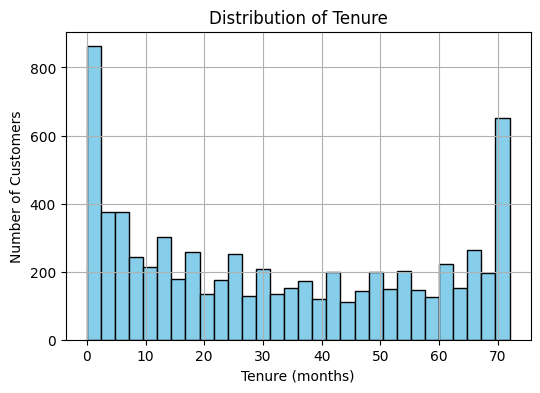

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["tenure"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()

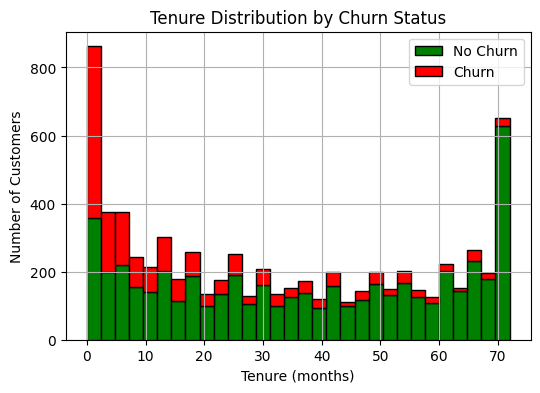

In [11]:
tenure_churn_no = df[df['Churn'] == 'No']['tenure']
tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure']

plt.figure(figsize=(6,4))
plt.hist(
    [tenure_churn_no, tenure_churn_yes],
    bins=30,
    stacked=True,
    color=['green', 'red'],
    edgecolor='black'
)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.legend(['No Churn', 'Churn'])
plt.grid()
plt.show()



In [14]:
print(df["InternetService"].unique())

['DSL' 'Fiber optic' 'No']


<Figure size 800x600 with 0 Axes>

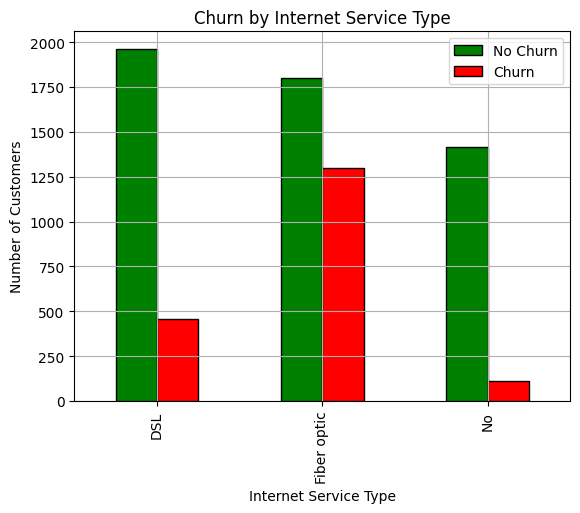

In [16]:
internet_churn = df.groupby(["InternetService", "Churn"]).size().unstack()

plt.figure(figsize=(8,6))
internet_churn.plot(
    kind='bar',
    color=['green', 'red'],
    edgecolor='black'
)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(['No Churn', 'Churn'])
plt.grid()
plt.show()



<Figure size 800x600 with 0 Axes>

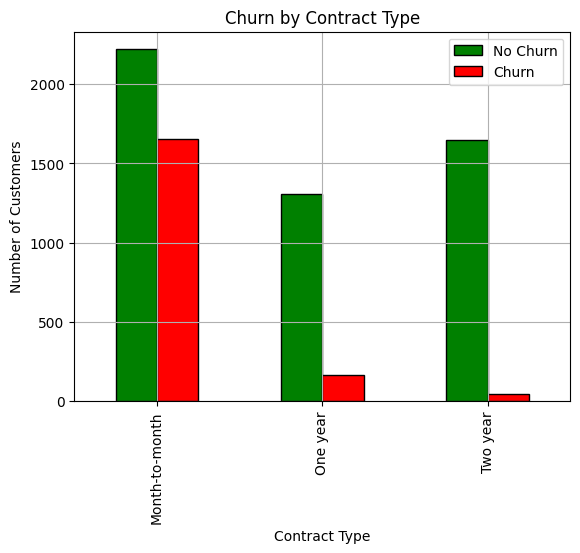

In [18]:
contract_churn = df.groupby(["Contract", "Churn"]).size().unstack()
plt.figure(figsize=(8,6))
contract_churn.plot(
    kind='bar',
    color=['green', 'red'],
    edgecolor='black'
)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(['No Churn', 'Churn'])
plt.grid()
plt.show()


In [20]:
(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


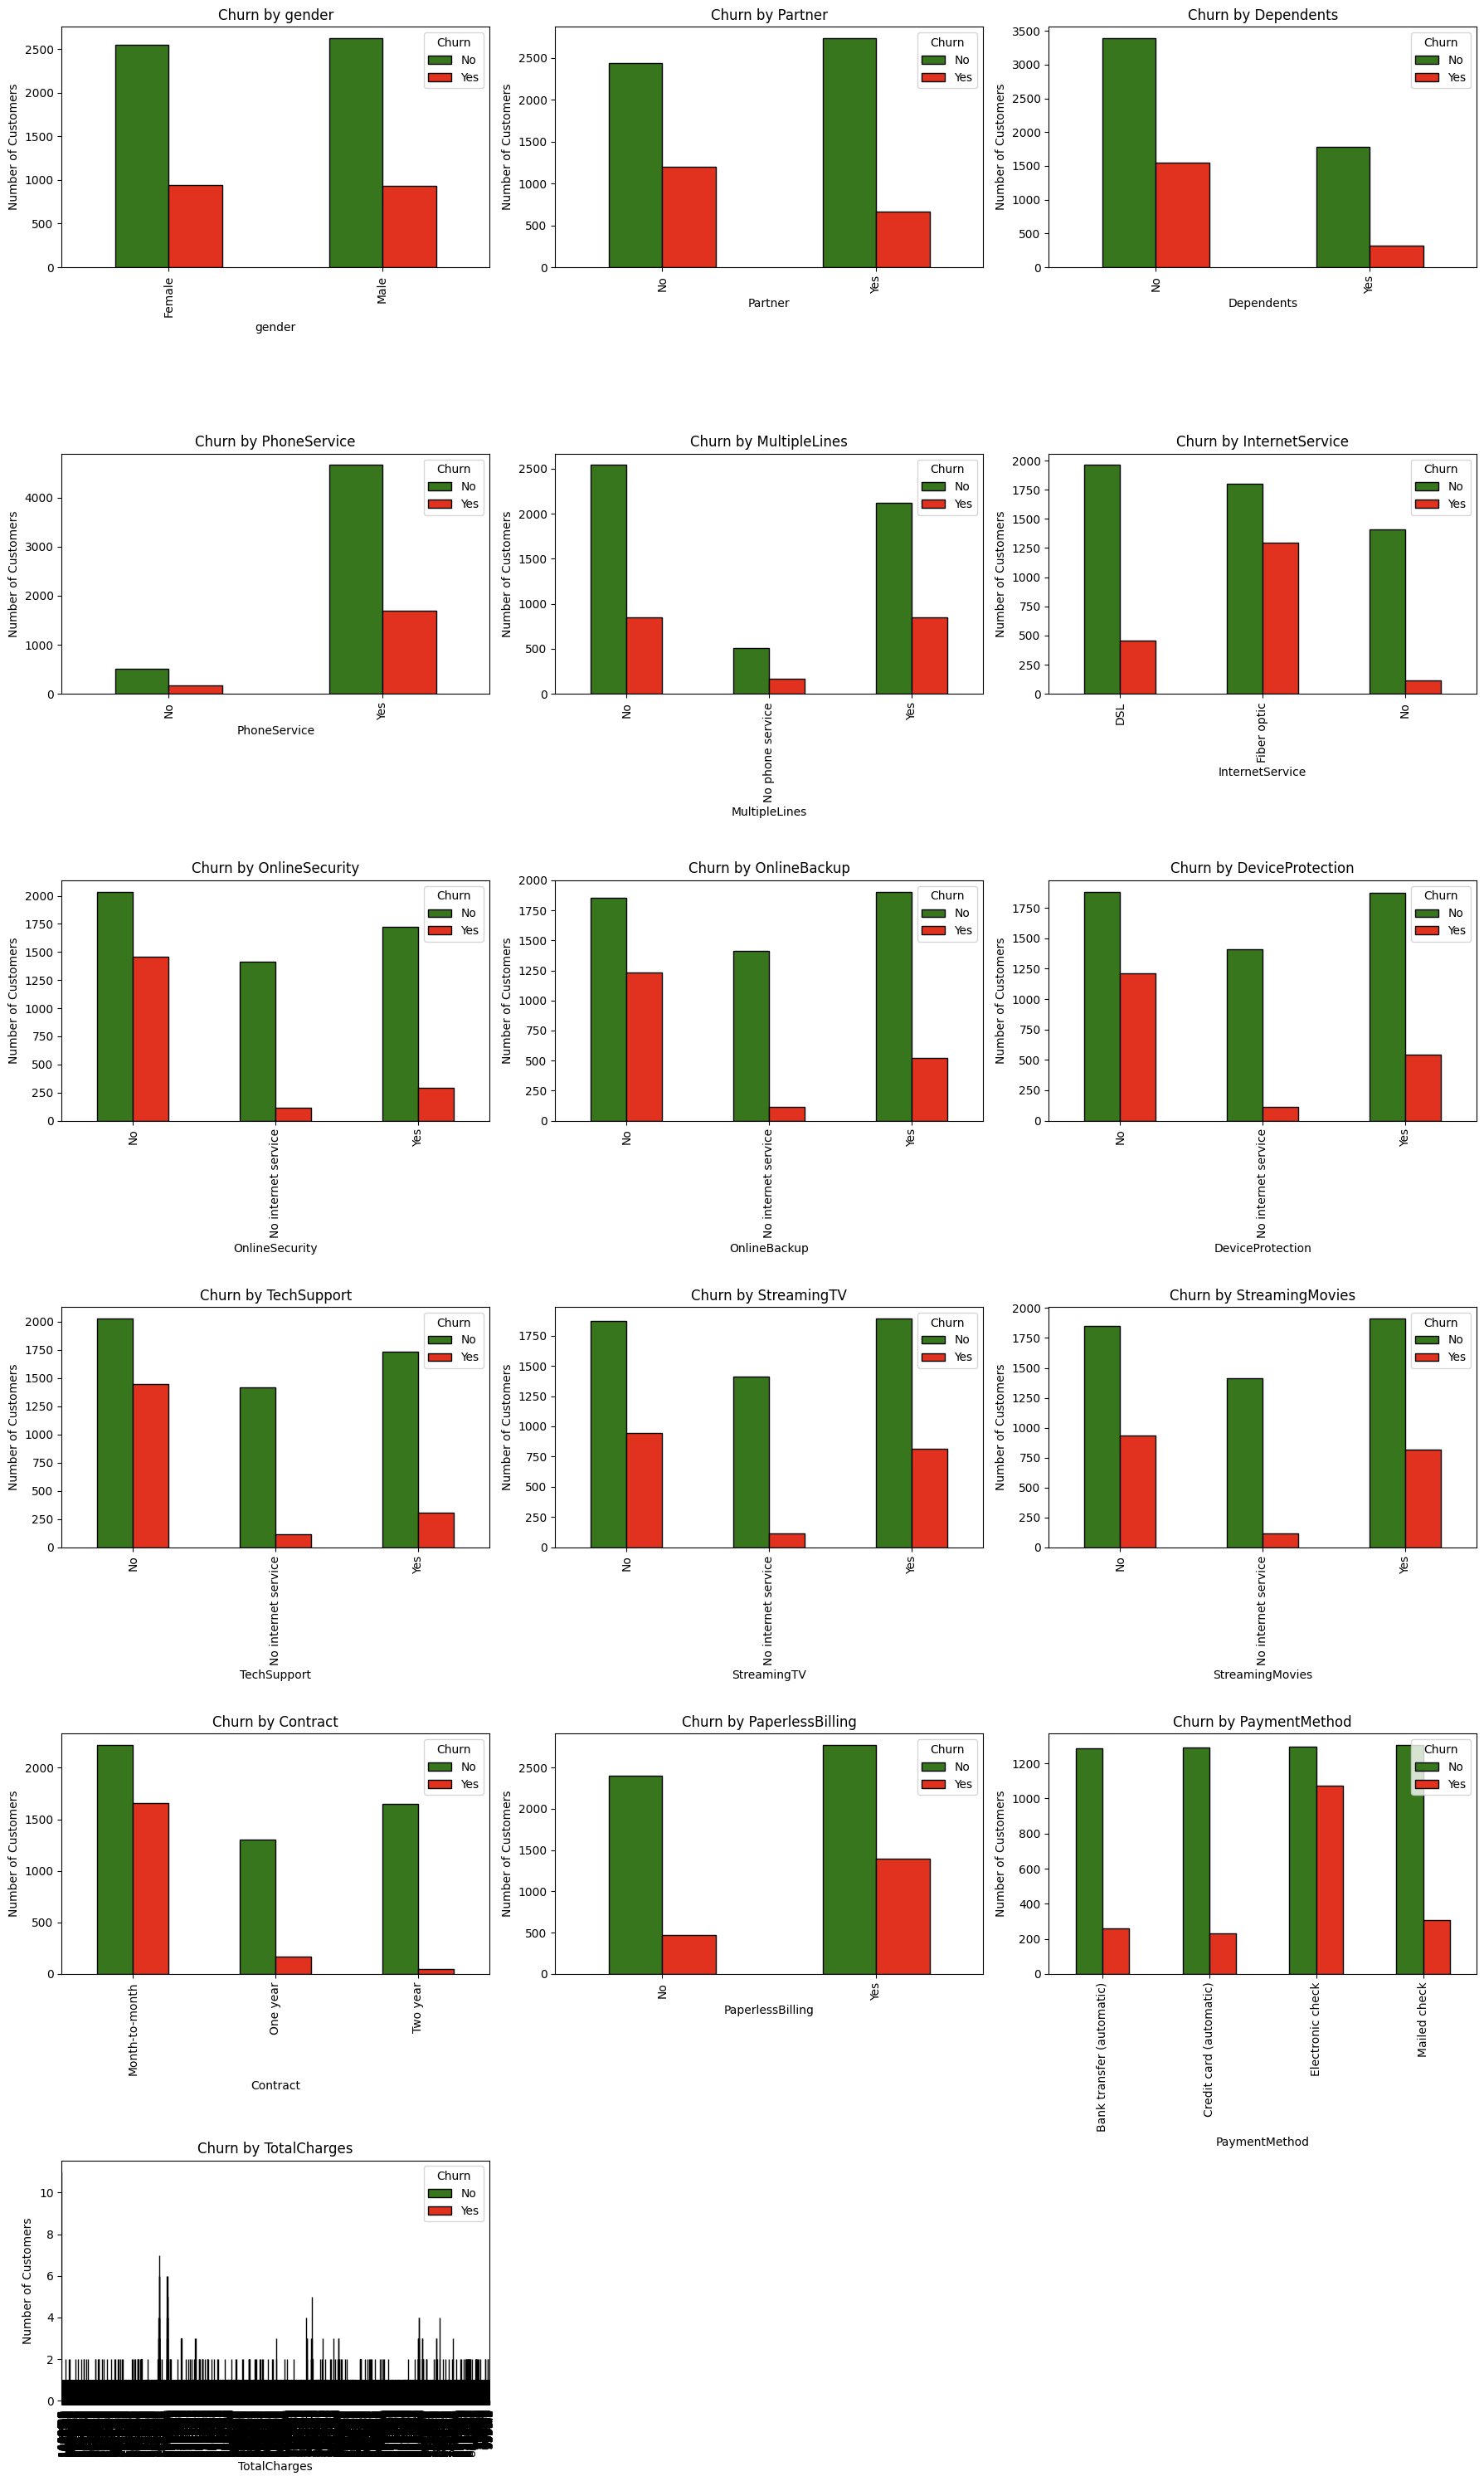

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify all categorical columns automatically
# We exclude 'Churn' (the target) and 'customerID' (too many unique values)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in cat_cols: cat_cols.remove('customerID')
if 'Churn' in cat_cols: cat_cols.remove('Churn')

# 2. Set up a grid for the plots
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

# 3. Loop through and create each plot
for i, col in enumerate(cat_cols):
    # Use the same logic from your first line of code!
    plot_data = df.groupby([col, 'Churn']).size().unstack()
    plot_data.plot(kind='bar', ax=axes[i], color=['#38761d', '#e0321f'], edgecolor='black')
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_ylabel('Number of Customers')

# 4. Clean up empty subplots and display
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()